In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cProfile, pstats

In [2]:
class ChessBoard :
    
    def __init__(self, board):
        self.board = board
        self.display = []
        self.size = len(board)
        
        for x in range(self.size):
            row = []
            for y in range(self.size):
                if board[x] == y:
                    row.append('Q')
                else:
                    row.append(1)
                    
            self.display.append(row)
            
    def disp_chess_board(self):
        for row in self.display:
            print(*row, sep='   ')
            
    def is_solution(self):
        for x in range(len(self.board)-1):    
            for y in range(x+1, len(self.board)):
                    
                if abs(x - y) == abs(self.board[x] - self.board[y]):
                    return False    
        return True
        

In [3]:
def init_bf_boards(board_list, board, size):
    if len(board) == size:
        board_list.append(board.copy())
        return
    
    for col in range(size):
        if(col not in board):
            board.append(col)
            init_bf_boards(board_list, board, size)
            board.pop()
            
    return board_list

In [4]:
def brute_force_approach(N):
    
    queen_solutions = []
    board_list = init_bf_boards([], [], N)
    
    for board in board_list:
        cb = ChessBoard(board)
        
        if cb.is_solution():
            
            queen_solutions.append(cb)
        
    return queen_solutions

In [5]:
solutions = brute_force_approach(4)

In [6]:
solutions[1].disp_chess_board()

1   1   Q   1
Q   1   1   1
1   1   1   Q
1   Q   1   1


In [7]:
result = []

''' A utility function to check if a queen can
be placed on board[row][col]. Note that this
function is called when "col" queens are
already placed in columns from 0 to col -1.
So we need to check only left side for
attacking queens '''

def isSafe(board, row, col, n):
    
    for i in range(col):
        if (board[row][i]):
            return False
        
    # Check upper diagonal on left side
    i = row
    j = col
    
    while i >= 0 and j >= 0:
        if(board[i][j]):
            return False
        
        i -= 1
        j -= 1
        
    # Check lower diagonal on left side
    i = row
    j = col
    
    while j>= 0 and i < n:
        if(board[i][j]):
            return False
        
        i = i + 1
        j = j - 1
        
    return True

''' A recursive utility function to solve N
Queen problem '''

def solveNQUtil(board, col, n):
    ''' base case: If all queens are placed thenb return true'''
    if (col == n):
        v = []
        for i in board:
            for j in range(len(i)):
                if i[j] == 1:
                    v.append(j)
        
        result.append(v)
        return True
    
    ''' Consider this column and try placing this queen in all rows one by one'''
    
    res = False
    for i in range(n):
        
        ''' Check if queen can be placed on board[i][col]'''
        
        if (isSafe(board, i, col, n)):
            
            # Place this queen in board[i][col]
            board[i][col] = 1
            
            #Make result true if any placement is possible
            res = solveNQUtil(board, col + 1, n) or res
            
            '''If placing queen in board[i][col] doesnt
            lead to a solution, then remove queen from board[i][col]'''
            board[i][col] = 0   # BACKTRACK
            
        ''' If queen can not be placed in any row in this
        column col then return false'''
        
    return res

''' This function solves the N Queen problem using
Backtracking. It mainly uses solveNQUtil() to
solve the problem. It returns false if queens
cannot be placed, otherwise return true and
prints placement of queens in the form of 1s.
Please note that there may be more than one
solutions, this function prints one of the
feasible solutions.'''

def solveNQ(n):
    result.clear()
    
    board = [[0 for j in range(n)] for i in range(n)]
    
    solveNQUtil(board, 0, n)
    result.sort()
    
    return result

In [8]:
# Driver Code
n = 8
res = solveNQ(n)

In [31]:
profiler = cProfile.Profile()

profiler.enable()
solveNQ(15)
profiler.disable()

stats = pstats.Stats(profiler).sort_stats('ncalls')

stats.strip_dirs()

stats.print_stats()

KeyboardInterrupt: 

In [21]:
cProfile.run("solveNQ(6)")

         1106 function calls (954 primitive calls) in 0.001 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      894    0.001    0.000    0.001    0.000 <ipython-input-7-609a893b41e6>:10(isSafe)
    153/1    0.000    0.000    0.001    0.001 <ipython-input-7-609a893b41e6>:43(solveNQUtil)
        1    0.000    0.000    0.001    0.001 <ipython-input-7-609a893b41e6>:88(solveNQ)
        1    0.000    0.000    0.000    0.000 <ipython-input-7-609a893b41e6>:91(<listcomp>)
        1    0.000    0.000    0.001    0.001 <string>:1(<module>)
        1    0.000    0.000    0.001    0.001 {built-in method builtins.exec}
       24    0.000    0.000    0.000    0.000 {built-in method builtins.len}
       28    0.000    0.000    0.000    0.000 {method 'append' of 'list' objects}
        1    0.000    0.000    0.000    0.000 {method 'clear' of 'list' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profil

In [12]:
bt_solutions = []

for board in res:
    bt_solutions.append(ChessBoard(board))
    
bt_solutions[0].disp_chess_board()

Q   1   1   1   1   1   1   1
1   1   1   1   Q   1   1   1
1   1   1   1   1   1   1   Q
1   1   1   1   1   Q   1   1
1   1   Q   1   1   1   1   1
1   1   1   1   1   1   Q   1
1   Q   1   1   1   1   1   1
1   1   1   Q   1   1   1   1


In [52]:
bf_timeit = []
backt_timeit = []

bf_timeit_avg = []
backt_timeit_avg = []

# Time Complexity of Brute Force
for x in range (3, 10):
    time1 = %timeit -o brute_force_approach(x)
    bf_timeit.append(time1)
    bf_timeit_avg.append(np.average(time1.timings))
    
    
    # Time COmplexity of BackTracking
    time2 = %timeit -o solveNQ(x)
    backt_timeit.append(time2)
    backt_timeit_avg.append(np.average(time2.timings))

70.3 µs ± 948 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
27.5 µs ± 253 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
351 µs ± 4.04 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
93.6 µs ± 1.53 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
2.16 ms ± 33.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
361 µs ± 5.25 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
15.8 ms ± 267 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.2 ms ± 3.06 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
130 ms ± 1.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
5.19 ms ± 31.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.23 s ± 9.81 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
22.3 ms ± 186 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
13.1 s ± 24.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
105 ms ± 575 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [54]:
n_values = [x for x in range(3, 10)]

In [67]:
print(bf_timeit_avg)
print(backt_timeit_avg)

[7.027957428571036e-05, 0.0003513099714291457, 0.002161682285721846, 0.015788572857137684, 0.13016544571437408, 1.2294526857138928, 13.149607871428868]
[2.745247999997186e-05, 9.357837571421571e-05, 0.0003613809571428906, 0.0011976354142861966, 0.005188214142851523, 0.02232177714291278, 0.10482229000008374]


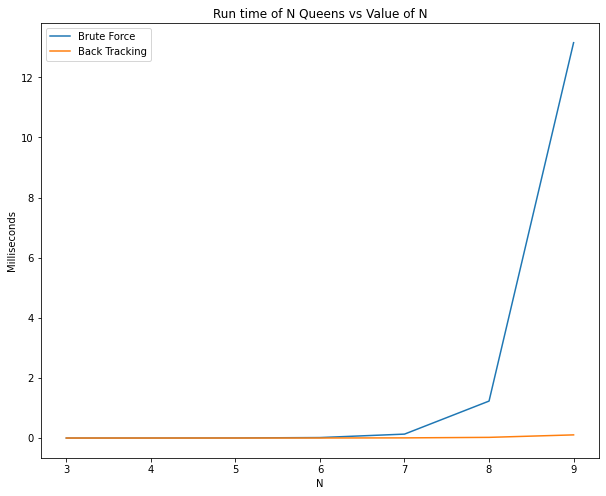

In [80]:
plt.figure(figsize=(10, 8))
plt.plot(n_values, bf_timeit_avg, label = "Brute Force")
plt.plot(n_values, backt_timeit_avg, label = "Back Tracking")
plt.ylabel('Milliseconds')
plt.xlabel('N')
plt.title('Run time of N Queens vs Value of N')
plt.legend()

plt.savefig("n_queens_brute_vs_back.png")